# Evaluación 2

---



**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 2 de la asignatura electiva de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Fase 0 - Cargar de los datos

In [1]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-05-31 00:09:22--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-05-31 00:09:22--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce954dd1ffad51925fbe1ff5ae5.dl.dropboxusercontent.com/cd/0/inline/Cqsn9cedgiFPW3A8EaAK_bx8C3Wb0Yr-vX04FK9l5soRy1slO4EMndASGzSsSSWkNIVHXVw-OaKSQuSGeUjjJ1LTnEkoNiUjezb58qQKLbz_G0srckf1j8wXxw9IkXQo_jTPR7D7wT_1QJftH6yoDKYB/file# [following]
--2025-05-31 00:09:23--  https://uce954dd1ffad51925fbe1f

In [75]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [20]:
df = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", decimal=",", low_memory = False)

# Fase 3 - Preparación de los datos

## Tratamiento de nulos

In [21]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


In [22]:
# Escriba su código acá
num_cols = ['Fac_T01', 'Fac_T02', 'Fac_T03', 'Fac_T04', 'Fac_T05', 'Fac_T06', 'Fac_T07',
        'Fac_T08', 'Fac_T09', 'Fac_T10', 'Fac_T11', 'Fac_T12', 'Edad', 'Antiguedad',
        'CUPO_L1', 'TC', 'Renta']

imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [23]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43.0,482688.2,130.0,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46.0,143640.0,69.0,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45.0,929106.0,24.0,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46.0,172447.0,134.0,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46.0,805250.0,116.0,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


## Transformación de variables

In [24]:
# Escriba su código acá
# Escalar los datos
scaler = StandardScaler()

    Fac_T01   Fac_T02   Fac_T03   Fac_T04   Fac_T05   Fac_T06   Fac_T07  \
0 -0.527489 -0.550336 -0.550068 -0.571488 -0.556933  0.242454  0.303478   
1  0.351310 -0.449978 -0.511503 -0.571488 -0.325823  0.922482 -0.108161   
2  0.894500 -0.143591 -0.504901  0.416026  0.019580 -0.107953  1.900800   
3 -0.439124 -0.494235 -0.366681 -0.317436 -0.370394  0.063607 -0.611008   
4  0.762510  1.801171  1.065954  0.431059  2.020639  1.892994  0.645924   

    Fac_T08   Fac_T09   Fac_T10   Fac_T11   Fac_T12      Edad  Antiguedad  \
0  0.002554 -0.338908 -0.423919 -0.547563 -0.077854  0.323032    2.553917   
1  1.356937  0.245745  1.905676  1.859973 -0.385213  0.548555    0.843902   
2  4.963217 -0.107754 -0.493164  0.256866  0.511933  0.473381   -0.417584   
3 -0.199342 -0.191855 -0.352603  0.050069 -0.172792  0.548555    2.666049   
4  3.846992  3.427134  0.852842  3.799057  0.634913  0.548555    2.161455   

    CUPO_L1        TC     Renta  
0 -0.311248  1.444648 -0.397862  
1 -0.355820 -0.834

# Fase 4 - Modelamiento

## Modelos de regresión

### Definición de Variable objetivo

In [26]:
# Escriba su código acá
y = df['Fac_T12']
data_y = pd.DataFrame(y)

### Distribución de variable objetivo

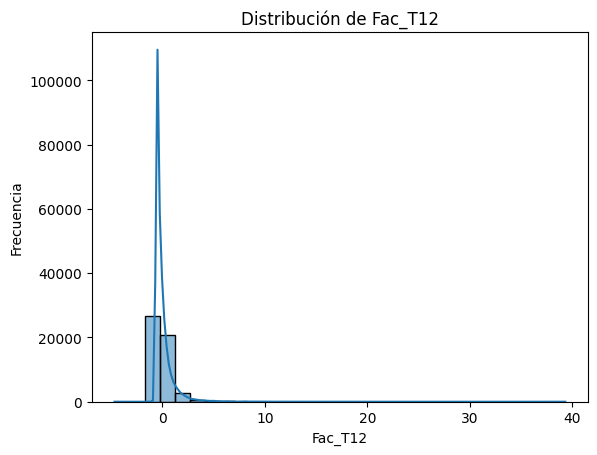

In [33]:
# Escriba su código acá
sns.histplot(df['Fac_T12'], bins=30, kde=True)
plt.title('Distribución de Fac_T12')
plt.xlabel('Fac_T12')
plt.ylabel('Frecuencia')
plt.show()

### Selección de variables independientes

In [34]:
#Se seleccionan las variables de "num_cols", "quitando Fac_T12", debido a que es nuestra variable objetivo
X = df[[col for col in num_cols if col != 'Fac_T12']]
data_x = pd.DataFrame(X)

### Separación datos de entrenamiento y test

In [35]:
# Escriba su código acá
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=29)

### Algoritmo 1 - `Regresion Polinomial`

#### Creación del modelo

In [115]:
# Escriba su código acá
grado_polinomio = 7 # Valor aleatorio
N = 800
polyfeats = PolynomialFeatures(degree = grado_polinomio, include_bias = True)
variable = 'CUPO_L1'
X = np.array(data_x[variable][:N]).reshape(-1,1)
X_poly = polyfeats.fit_transform(X)

#### Entrenamiento del modelo

In [116]:
# Escriba su código acá
reg_poly = LinearRegression(fit_intercept = False)
reg_poly.fit(X_poly, data_y[:N])
print('Coeficientes = {}'.format(reg_poly.coef_[0]))

Coeficientes = [ 1.83355427e-01  2.22863459e-01 -3.88473424e-01 -1.67782125e-03
  1.71633360e-01 -5.98540545e-02  7.15200954e-03 -2.80108325e-04]


#### Evaluación del modelo

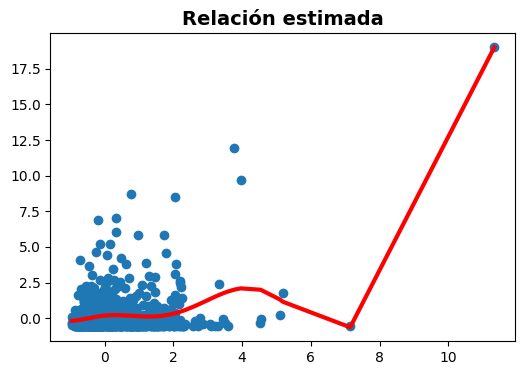

In [117]:
# Escriba su código acá
l_ordenada = list(data_x[variable][:N])
l_ordenada.sort()

fig, ax = plt.subplots(1, 1, figsize = (6, 4))
plt.scatter(X, data_y[:N])

y_estimado = np.polyval(np.flip(reg_poly.coef_[0]), l_ordenada)

ax.plot(l_ordenada, y_estimado, color = 'red', linewidth = 3)

plt.title("Relación estimada", fontsize=14, fontweight="bold")
plt.show()

#### Cálculo e interpretación de métricas

##### R2

In [118]:
# Escriba su código acá
print('Calidad de ajuste R^2 = {:.3f}'.format(reg_poly.score(X_poly, data_y[:N])))

Calidad de ajuste R^2 = 0.259


Tenemos un 26%, lo que es bajo.

##### MAE

In [119]:
# Escriba su código acá
print('Mean absolute error: %.2f'
      % mean_absolute_error(data_y[:N], y_estimado))

Mean absolute error: 0.80


### Algoritmo 2 - `DecisionTreeRegressor`

#### Creación del modelo

In [120]:
# Escriba su código acá
reg_tree = DecisionTreeRegressor(max_depth=7)

#### Entrenamiento del modelo

Profundidad del árbol: 7


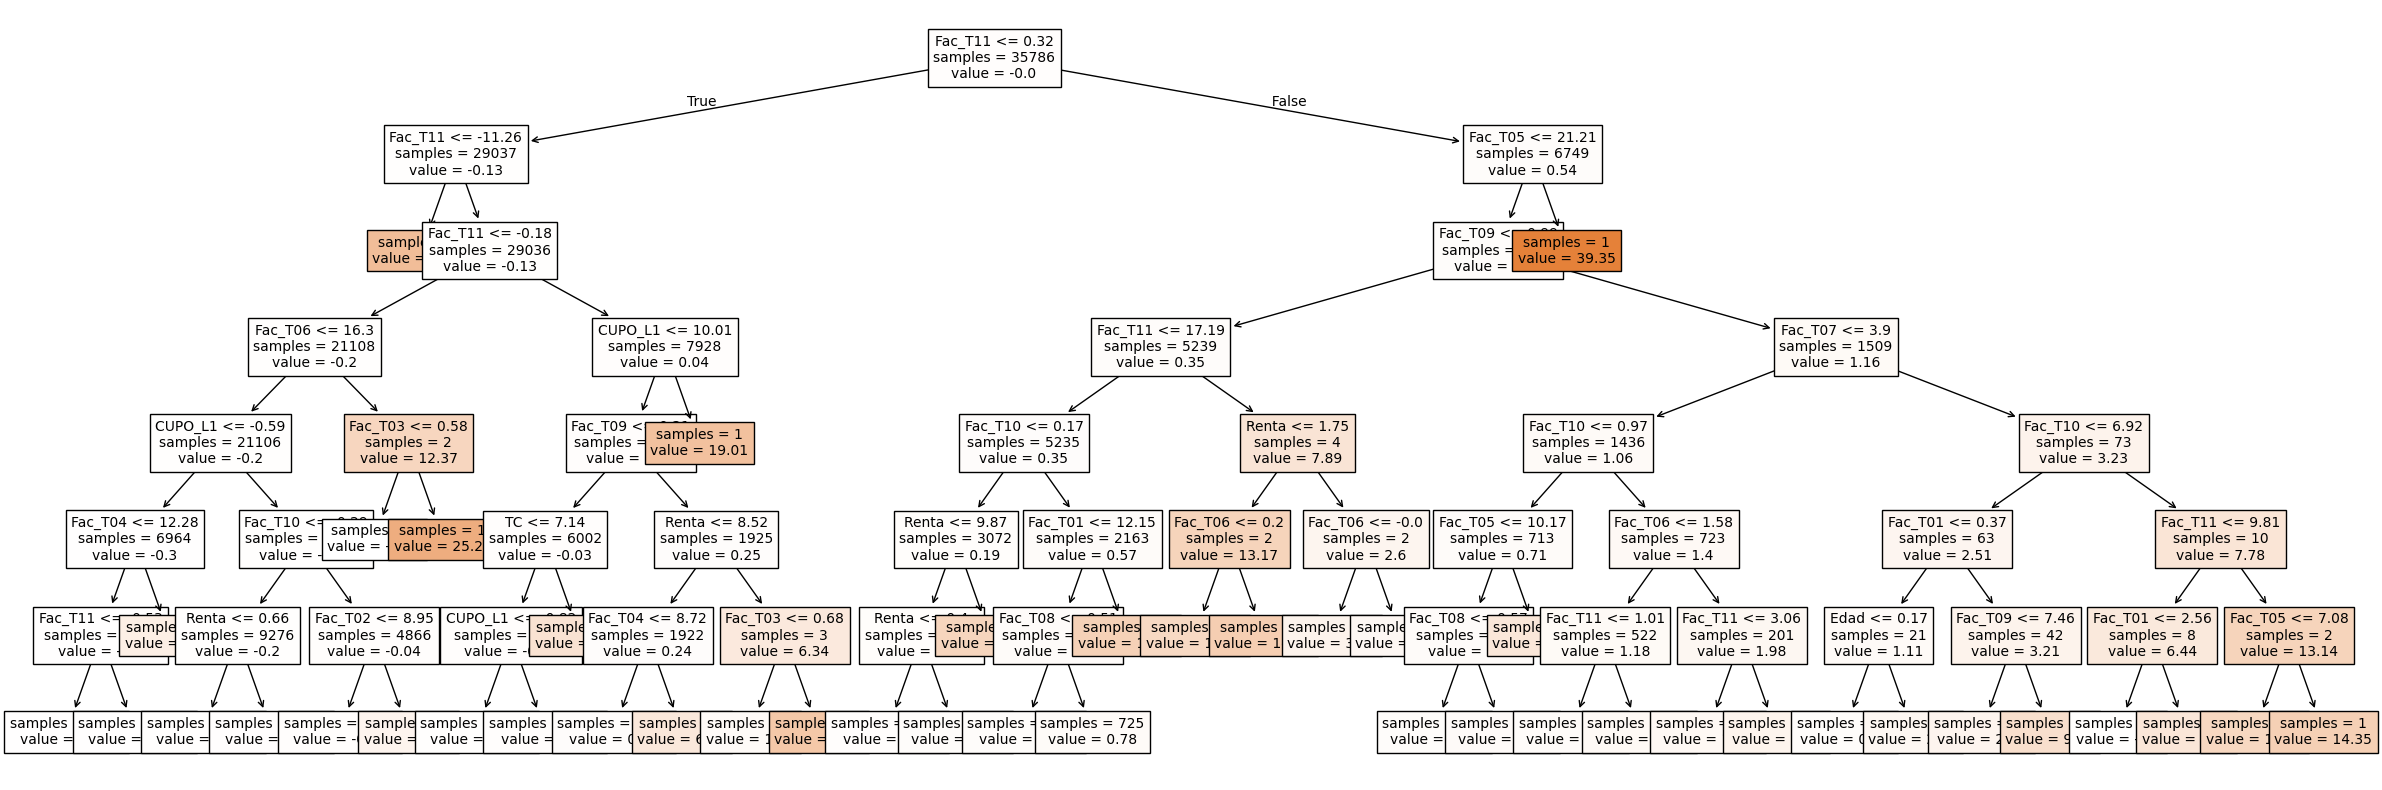

In [121]:
# Escriba su código acá
reg_tree.fit(X_train, y_train)
y_predicted = reg_tree.predict(X_test)

# Visualización
fig, ax = plt.subplots(figsize=(30, 10))
print('Profundidad del árbol:', reg_tree.get_depth())

plot = plot_tree(decision_tree = reg_tree,
      feature_names = data_x.columns,
      filled = True,
      impurity = False,
      fontsize = 10,
      precision = 2,
      ax = ax)

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### R2

In [122]:
# Escriba su código acá
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predicted))

Coefficient of determination: 0.12


##### MAE

In [123]:
# Escriba su código acá
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predicted))

Mean absolute error: 0.50


### Comparación de los modelos

## Modelo de clasificación

### Distribución de variable objetivo

In [ ]:
# Escriba su código acá

### Selección de variables independientes

In [ ]:
# Escriba su código acá

### Separación datos entrenamiento y test

In [ ]:
# Escriba su código acá

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo

In [ ]:
# Escriba su código acá

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

In [ ]:
# Escriba su código acá

##### Accuracy

In [ ]:
# Escriba su código acá

#### Aplicación de `CrossValidation`

In [ ]:
# Escriba su código acá

#### Análisis de métricas usando `CrossValidation`

### Algoritmo 2 - SVM

#### Creación del modelo

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo

In [ ]:
# Escriba su código acá

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

In [ ]:
# Escriba su código acá

##### Accuracy

In [ ]:
# Escriba su código acá

#### Aplicación de `CrossValidation`

In [ ]:
# Escriba su código acá

#### Análisis de métricas usando `CrossValidation`

In [ ]:
# Escriba su código acá

### Algoritmo 3 - KNN

#### Creación del modelo

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo

In [ ]:
# Escriba su código acá

#### Evaluación del modelo

In [ ]:
# Escriba su código acá

#### Cálculo e interpretación de métricas

##### Matriz de confusión

In [ ]:
# Escriba su código acá

##### Accuracy

In [ ]:
# Escriba su código acá

#### Aplicación de `CrossValidation`

In [ ]:
# Escriba su código acá

#### Análisis de métricas usando `CrossValidation`

In [ ]:
# Escriba su código acá

### Comparación de los modelos

In [ ]:
# Escriba su código acá